In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, timezone
import pytz
import numpy as np
from transformers import pipeline
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string
from dotenv import load_dotenv
import os
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import warnings
from bs4 import BeautifulSoup
import requests
import time

In [2]:
# Set the option to display all rows
pd.set_option('display.max_rows', None)

# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [3]:
from bs4 import BeautifulSoup
import requests

url = 'https://news.google.com/search?q=saint%20laurent%20when%3A1y&hl=en-CA&gl=CA&ceid=CA%3Aen'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

dates = []
sources = []
headlines = []

# Loop through each article div
for article in soup.find_all('div', class_='xrnccd'):
    # Extract the headline
    headline = article.find('a', class_='DY5T1d RZIKme')
    headlines.append(headline.text if headline else 'N/A')
    
    # Extract the source
    source = article.find('a', class_='wEwyrc')
    sources.append(source.text if source else 'N/A')
    
    # Extract the date
    date = article.find('time')
    dates.append(date['datetime'] if date else 'N/A')

# Create a DataFrame
data = {
    'Date': dates,
    'Source': sources,
    'Headline': headlines
}
df = pd.DataFrame(data)
print(df)


                    Date                     Source  \
0   2023-08-16T01:27:46Z          CityNews Montreal   
1   2023-08-09T07:00:00Z                   CBS News   
2   2023-08-09T07:00:00Z           KTLA Los Angeles   
3   2023-08-09T07:00:00Z                    KABC-TV   
4   2023-08-08T18:09:25Z             Sharp Magazine   
5   2023-08-16T07:52:26Z            NYLON SINGAPORE   
6   2023-07-25T07:00:00Z             Sharp Magazine   
7   2023-07-21T07:00:00Z               The Guardian   
8   2023-08-08T10:52:16Z                 Wallpaper*   
9   2023-08-05T07:00:00Z               Highsnobiety   
10  2023-08-03T22:56:06Z   The Moodie Davitt Report   
11  2023-07-30T07:00:00Z          CTV News Montreal   
12  2023-02-08T08:00:00Z       L'Officiel Singapore   
13  2023-08-01T07:00:00Z                     Louder   
14  2023-08-17T16:40:53Z          CTV News Montreal   
15  2023-08-08T19:42:29Z              Bloomberg Law   
16  2023-08-14T14:00:00Z    The Business of Fashion   
17  2023-0

In [4]:
df.head(100)

Date                     Source  \
0   2023-08-16T01:27:46Z          CityNews Montreal   
1   2023-08-09T07:00:00Z                   CBS News   
2   2023-08-09T07:00:00Z           KTLA Los Angeles   
3   2023-08-09T07:00:00Z                    KABC-TV   
4   2023-08-08T18:09:25Z             Sharp Magazine   
5   2023-08-16T07:52:26Z            NYLON SINGAPORE   
6   2023-07-25T07:00:00Z             Sharp Magazine   
7   2023-07-21T07:00:00Z               The Guardian   
8   2023-08-08T10:52:16Z                 Wallpaper*   
9   2023-08-05T07:00:00Z               Highsnobiety   
10  2023-08-03T22:56:06Z   The Moodie Davitt Report   
11  2023-07-30T07:00:00Z          CTV News Montreal   
12  2023-02-08T08:00:00Z       L'Officiel Singapore   
13  2023-08-01T07:00:00Z                     Louder   
14  2023-08-17T16:40:53Z          CTV News Montreal   
15  2023-08-08T19:42:29Z              Bloomberg Law   
16  2023-08-14T14:00:00Z    The Business of Fashion   
17  2023-08-02T12:56:09Z               Highsnobiety   
18  2023-07-20T19:14:45Z              vmagazine.com   
19  2023-08-01T07:00:00Z   The Gleaner / Le Gleaner   
20  2023-08-17T18:48:08Z           Montreal Gazette   
21  2023-08-11T18:34:53Z  Red Carpet Fashion Awards   
22  2023-08-02T07:00:00Z                        WWD   
23  2023-07-31T07:00:00Z                        WWD   
24  2023-08-16T11:16:00Z                     openPR   
25  2023-08-17T17:13:55Z                 W Magazine   
26  2023-08-07T07:00:00Z  Red Carpet Fashion Awards   
27  2023-08-03T07:00:00Z             Luxus Plus Mag   
28  2023-08-17T17:21:10Z            Harper's BAZAAR   
29  2023-08-16T14:55:27Z                Global News   
30  2023-08-17T17:11:23Z                   MTL Blog   
31  2023-08-16T13:00:00Z     The Suburban Newspaper   
32  2023-08-10T14:00:28Z                 The Manual   
33  2023-08-15T06:01:44Z                   Euronews   
34  2023-07-30T07:00:00Z           Montreal Gazette   
35  2023-08-17T15:07:00Z                    Insider   
36  2023-08-10T02:00:15Z                      Style   
37  2023-08-17T15:15:02Z                     HELLO!   
38  2023-08-17T19:26:11Z            The Independent   
39  2023-08-16T14:26:09Z            Harper's BAZAAR   
40  2023-07-20T07:00:00Z             Ottawa Citizen   
41  2023-08-17T16:46:50Z            Harper's BAZAAR   
42  2023-08-14T05:00:00Z                 Wallpaper*   
43  2023-08-08T07:00:00Z                 W Magazine   
44  2023-08-14T17:42:08Z        Yahoo Canada Sports   
45  2023-07-25T07:00:00Z                    Preview   
46  2023-08-01T15:01:49Z   The Gleaner / Le Gleaner   
47  2023-08-17T08:50:16Z            Hospitality Net   
48  2023-08-17T13:00:21Z         The New York Times   
49  2023-07-19T07:00:00Z             Liverpool Echo   
50  2023-08-16T15:30:50Z                     Brides   
51  2023-08-12T17:19:00Z                 MétéoMédia   
52  2023-07-19T07:00:00Z                        WWD   
53  2023-07-24T07:00:00Z                  HYPEBEAST   
54  2023-07-19T07:00:00Z      Yahoo Canada Shine On   
55  2023-08-17T10:00:50Z            Financial Times   
56  2023-08-15T17:22:51Z            Harper's BAZAAR   
57  2023-08-12T19:00:00Z      Sydney Morning Herald   
58  2023-08-16T01:00:00Z             Irish Examiner   
59  2023-07-19T07:00:00Z                 The US Sun   
60  2023-08-14T19:19:21Z                 W Magazine   
61  2023-05-05T07:00:00Z         City of Lethbridge   
62  2023-08-17T15:18:31Z                    Veranda   
63  2023-08-10T14:03:45Z                  ICON-ICON   
64  2023-05-03T07:00:00Z          Cultured Magazine   
65  2023-06-09T07:00:00Z                    Esquire   
66  2023-04-13T07:00:00Z                        WWD   
67  2023-06-13T07:00:00Z                        WWD   
68  2023-08-14T20:49:20Z                      Patch   
69  2023-08-16T13:00:54Z             Viste la Calle   
70  2023-06-23T07:00:00Z                Global News   
71  2023-05-24T07:00:00Z                        WWD   
72  2

In [21]:
brands = [
    "Gucci", "Prada", "Tom Ford", "Versace",
    "Dolce & Gabbana", "Bvlgari", "Chanel",
    "Dior", "Saint Laurent", "Balenciaga"
]

all_dates = []
all_sources = []
all_headlines = []
all_brands = []

for brand in brands:
    brand_query = brand.replace(' ', '%20')
    url = f'https://news.google.com/search?q={brand_query}%20when%3A1y&hl=en-CA&gl=CA&ceid=CA%3Aen'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Loop through each article div
    for article in soup.find_all('div', class_='xrnccd'):
        # Extract the headline
        headline = article.find('a', class_='DY5T1d RZIKme')
        all_headlines.append(headline.text if headline else 'N/A')

        # Extract the source
        source = article.find('a', class_='wEwyrc')
        all_sources.append(source.text if source else 'N/A')

        # Extract the date
        date = article.find('time')
        all_dates.append(date['datetime'] if date else 'N/A')

        # Append the brand
        all_brands.append(brand)

    # Wait for 10 seconds before the next query
    time.sleep(10)

# Create a DataFrame
data = {
    'Date': all_dates,
    'Source': all_sources,
    'Headline': all_headlines,
    'Brand': all_brands
}
df = pd.DataFrame(data)
print(df)


                     Date                                             Source  \
0    2023-08-17T18:23:00Z                                 Retail TouchPoints   
1    2023-08-17T02:00:00Z                                        PR Newswire   
2    2023-08-17T04:16:02Z                                 Inside Retail Asia   
3    2023-08-16T15:52:13Z                                             Forbes   
4    2023-08-17T17:12:16Z                                 FOX 11 Los Angeles   
5    2023-08-17T20:46:24Z                                       Whiskey Riff   
6    2023-08-17T20:00:00Z                                       Toronto Star   
7    2023-08-17T07:39:05Z                                 Marketscreener.com   
8    2023-08-11T23:00:28Z                                 Hollywood Reporter   
9    2023-08-16T09:00:00Z                                         Wallpaper*   
10   2023-07-19T07:00:00Z                                            Reuters   
11   2023-08-16T00:52:00Z               

In [22]:
df.shape

(947, 4)

In [23]:
df[df['Brand']=='Saint Laurent']

Date                     Source  \
766  2023-08-16T01:27:46Z          CityNews Montreal   
767  2023-08-09T07:00:00Z            CBS Los Angeles   
768  2023-08-09T07:00:00Z           KTLA Los Angeles   
769  2023-08-08T18:09:25Z             Sharp Magazine   
770  2023-08-16T07:52:26Z            NYLON SINGAPORE   
771  2023-07-25T07:00:00Z             Sharp Magazine   
772  2023-07-21T07:00:00Z               The Guardian   
773  2023-08-08T10:52:16Z                 Wallpaper*   
774  2023-08-05T07:00:00Z               Highsnobiety   
775  2023-08-17T16:40:53Z          CTV News Montreal   
776  2023-07-30T07:00:00Z          CTV News Montreal   
777  2023-02-08T08:00:00Z       L'Officiel Singapore   
778  2023-08-01T07:00:00Z                     Louder   
779  2023-08-08T19:42:29Z              Bloomberg Law   
780  2023-08-07T13:59:30Z             DFNIonline.com   
781  2023-08-14T14:00:00Z    The Business of Fashion   
782  2023-08-02T12:56:09Z               Highsnobiety   
783  2023-07-20T19:14:45Z              vmagazine.com   
784  2023-08-01T07:00:00Z   The Gleaner / Le Gleaner   
785  2023-08-17T18:48:08Z           Montreal Gazette   
786  2023-08-11T18:34:53Z  Red Carpet Fashion Awards   
787  2023-08-02T07:00:00Z                        WWD   
788  2023-07-31T07:00:00Z                        WWD   
789  2023-08-16T11:16:00Z                     openPR   
790  2023-08-02T09:46:14Z                       MEGA   
791  2023-08-17T17:13:55Z                 W Magazine   
792  2023-08-07T07:00:00Z  Red Carpet Fashion Awards   
793  2023-08-03T07:00:00Z             Luxus Plus Mag   
794  2023-08-17T17:21:10Z            Harper's BAZAAR   
795  2023-08-16T14:55:27Z                Global News   
796  2023-08-17T17:11:23Z                   MTL Blog   
797  2023-08-16T13:00:00Z     The Suburban Newspaper   
798  2023-08-10T14:00:28Z                 The Manual   
799  2023-08-15T06:01:44Z                   Euronews   
800  2023-07-30T07:00:00Z           Montreal Gazette   
801  2023-07-24T07:00:00Z                        WWD   
802  2023-08-09T13:54:05Z                        MLW   
803  2023-08-17T15:07:00Z                    Insider   
804  2023-08-10T02:00:15Z                      Style   
805  2023-08-17T15:15:02Z                     HELLO!   
806  2023-08-17T19:26:11Z            The Independent   
807  2023-08-16T14:26:09Z            Harper's BAZAAR   
808  2023-07-20T07:00:00Z             Ottawa Citizen   
809  2023-07-26T07:00:00Z              Footwear News   
810  2023-08-17T16:46:50Z            Harper's BAZAAR   
811  2023-08-08T07:00:00Z                 W Magazine   
812  2023-08-14T05:00:00Z                 Wallpaper*   
813  2023-08-14T17:42:08Z        Yahoo Canada Sports   
814  2023-07-25T07:00:00Z                    Preview   
815  2023-08-01T15:01:49Z   The Gleaner / Le Gleaner   
816  2023-08-14T22:07:35Z           Middletown Press   
817  2023-08-17T08:50:16Z            Hospitality Net   
818  2023-07-18T07:00:00Z         The New York Times   
819  2023-08-17T13:00:21Z         The New York Times   
820  2023-07-19T07:00:00Z             Liverpool Echo   
821  2023-08-12T17:19:00Z                 MétéoMédia   
822  2023-08-16T15:30:50Z                     Brides   
823  2023-07-29T07:00:00Z                 Wallpaper*   
824  2023-08-17T21:00:00Z           Westside Current   
825  2023-07-24T07:00:00Z                  HYPEBEAST   
826  2023-07-18T07:00:00Z                     Tatler   
827  2023-07-19T07:00:00Z      Yahoo Canada Shine On   
828  2023-07-25T07:00:00Z             Liverpool Echo   
829  2023-07-23T07:00:00Z      Sydney Morning Herald   
830  2023-08-17T10:00:50Z            Financial Times   
831  2023-08-15T17:22:51Z            Harper's BAZAAR   
832  2023-08-08T16:14:17Z                        WWD   
833  2023-08-12T19:00:00Z      Sydney Morning Herald   
834  2023-08-16T01:00:00Z             Irish Examiner   
835  2023-07-26T07:00:00Z              Footwear News   
836  2023-08-17T20:54:04Z          Good House

In [24]:
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

def analyze_sentiment(text):
    result = sentiment_analyzer(text)[0]
    sentiment_score = result['score'] if result['label'] == 'POSITIVE' else -result['score']
    return result['label'], sentiment_score

# Apply the function to the DataFrame and create new columns for both the label and the score
df['Sentiment'], df['Sentiment_Score'] = zip(*df['Headline'].apply(analyze_sentiment))


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [25]:
csv_path = "D:\\portfolio_projects\\luxury_sunglasses\\luxury_brands.csv"
df.to_csv(csv_path, index=False)
print(f"CSV file saved to {csv_path}")

CSV file saved to D:\portfolio_projects\luxury_sunglasses\luxury_brands.csv


In [26]:
## START HERE TO AVOID SCRAPING AGAIN
csv_path = "D:\\portfolio_projects\\luxury_sunglasses\\luxury_brands.csv"
df = pd.read_csv(csv_path)
df['Date'] = pd.to_datetime(df['Date'])
df.head(10)

Date              Source  \
0 2023-08-17 18:23:00+00:00  Retail TouchPoints   
1 2023-08-17 02:00:00+00:00         PR Newswire   
2 2023-08-17 04:16:02+00:00  Inside Retail Asia   
3 2023-08-16 15:52:13+00:00              Forbes   
4 2023-08-17 17:12:16+00:00  FOX 11 Los Angeles   
5 2023-08-17 20:46:24+00:00        Whiskey Riff   
6 2023-08-17 20:00:00+00:00        Toronto Star   
7 2023-08-17 07:39:05+00:00  Marketscreener.com   
8 2023-08-11 23:00:28+00:00  Hollywood Reporter   
9 2023-08-16 09:00:00+00:00          Wallpaper*   

                                            Headline  Brand Sentiment  \
0    Gucci Launches Digital Flagship Store on JD.com  Gucci  POSITIVE   
1  Gucci and JD.com Announce Digital Partnership ...  Gucci  POSITIVE   
2       Gucci launches flagship store on JD platform  Gucci  POSITIVE   
3  Brands Like OBEY And Gucci Confront A New, Shi...  Gucci  POSITIVE   
4  'Flash mob' robs Costa Mesa Gucci store of $10...  Gucci  NEGATIVE   
5  Gucci Mane Looks To Venture Into Country Music...  Gucci  NEGATIVE   
6  Canada’s coolest supermodel Daria Werbowy disa...  Gucci  POSITIVE   
7  JD.com, Gucci Enter Digital Partnership, to Op...  Gucci  POSITIVE   
8  Fall’s Must-Have Designer Bags: Gucci’s Tom Fo...  Gucci  POSITIVE   
9  Inside Gucci ArtLab, the house's vibrant hub f...  Gucci  POSITIVE   

   Sentiment_Score  
0         0.976898  
1         0.998710  
2         0.957851  
3         0.934808  
4        -0.999370  
5        -0.907728  
6         0.999334  
7         0.985511  
8         0.974806  
9         0.999716

In [27]:
sources_to_remove = [
    "CTV News Montreal",
    "World Nuclear News",
    "Yahoo Canada Sports",
    "MétéoMédia",
    "Montreal Gazette",
    "The Suburban Newspaper",
    "MTL Blog",
    "Global News"
]

df = df[~df['Source'].isin(sources_to_remove)]


In [29]:
df.head(10)

Date              Source  \
0 2023-08-17 18:23:00+00:00  Retail TouchPoints   
1 2023-08-17 02:00:00+00:00         PR Newswire   
2 2023-08-17 04:16:02+00:00  Inside Retail Asia   
3 2023-08-16 15:52:13+00:00              Forbes   
4 2023-08-17 17:12:16+00:00  FOX 11 Los Angeles   
5 2023-08-17 20:46:24+00:00        Whiskey Riff   
6 2023-08-17 20:00:00+00:00        Toronto Star   
7 2023-08-17 07:39:05+00:00  Marketscreener.com   
8 2023-08-11 23:00:28+00:00  Hollywood Reporter   
9 2023-08-16 09:00:00+00:00          Wallpaper*   

                                            Headline  Brand Sentiment  \
0    Gucci Launches Digital Flagship Store on JD.com  Gucci  POSITIVE   
1  Gucci and JD.com Announce Digital Partnership ...  Gucci  POSITIVE   
2       Gucci launches flagship store on JD platform  Gucci  POSITIVE   
3  Brands Like OBEY And Gucci Confront A New, Shi...  Gucci  POSITIVE   
4  'Flash mob' robs Costa Mesa Gucci store of $10...  Gucci  NEGATIVE   
5  Gucci Mane Looks To Venture Into Country Music...  Gucci  NEGATIVE   
6  Canada’s coolest supermodel Daria Werbowy disa...  Gucci  POSITIVE   
7  JD.com, Gucci Enter Digital Partnership, to Op...  Gucci  POSITIVE   
8  Fall’s Must-Have Designer Bags: Gucci’s Tom Fo...  Gucci  POSITIVE   
9  Inside Gucci ArtLab, the house's vibrant hub f...  Gucci  POSITIVE   

   Sentiment_Score  
0         0.976898  
1         0.998710  
2         0.957851  
3         0.934808  
4        -0.999370  
5        -0.907728  
6         0.999334  
7         0.985511  
8         0.974806  
9         0.999716

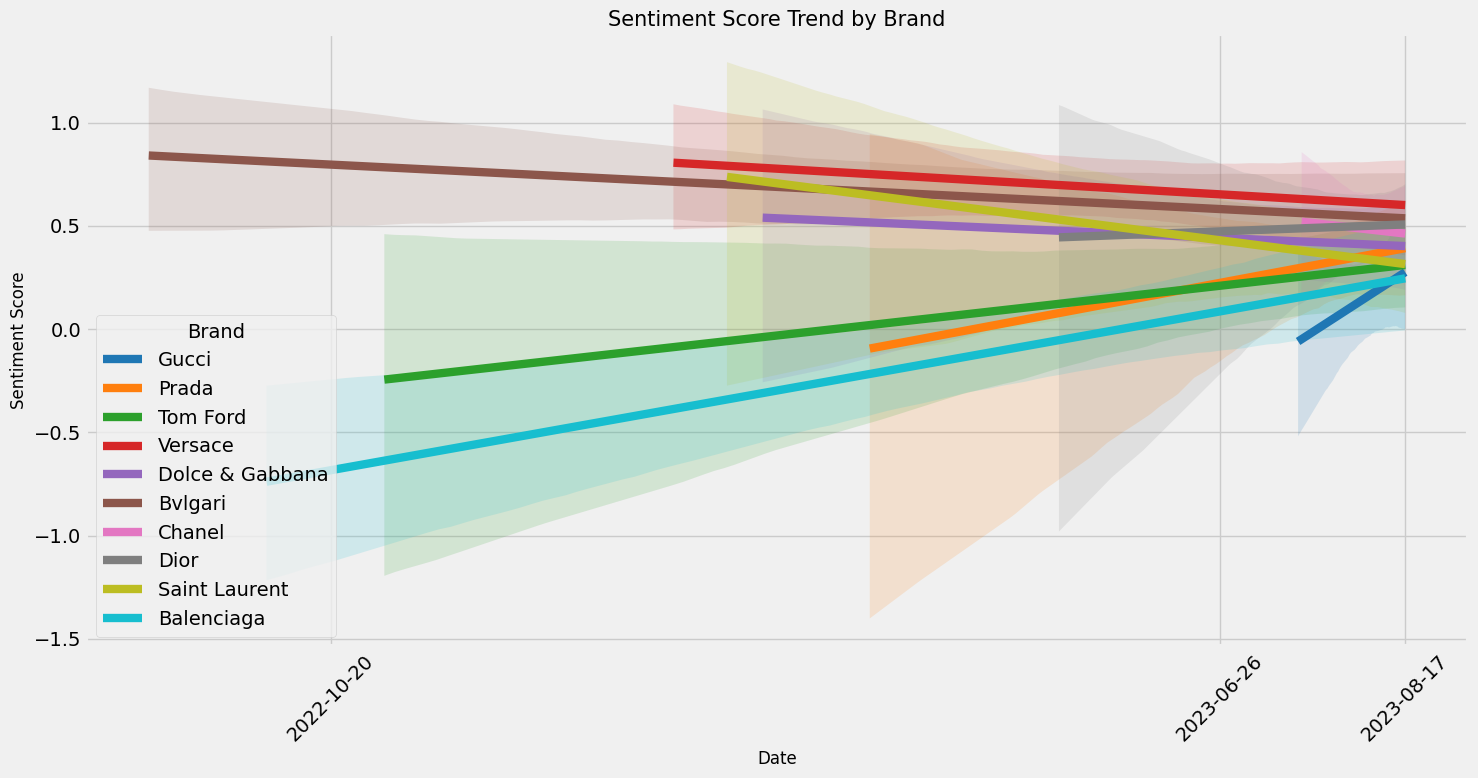

In [30]:
# Define the color palette
palette = sns.color_palette("tab10", n_colors=df['Brand'].nunique())

# Convert the date to ordinal numbers
df['Date_Numeric'] = df['Date'].apply(lambda x: x.toordinal())

plt.figure(figsize=(15, 8))
plt.style.use('fivethirtyeight')

# Iterate through the unique brands and plot a trendline for each, using the color palette
for i, brand in enumerate(df['Brand'].unique()):
    brand_data = df[df['Brand'] == brand]
    sns.regplot(data=brand_data, x='Date_Numeric', y='Sentiment_Score', label=brand, scatter=False, order=1, color=palette[i])

# Customize the plot
plt.title('Sentiment Score Trend by Brand', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)
plt.legend(title='Brand')

# Determine a reasonable interval for the x-ticks
x_ticks_interval = len(df['Date'].unique()) // 10
x_ticks = df['Date_Numeric'].unique()[::x_ticks_interval]
x_ticklabels = df['Date'].dt.strftime('%Y-%m-%d').unique()[::x_ticks_interval]

plt.xticks(ticks=x_ticks, labels=x_ticklabels, rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [45]:
# Extract the week number from the 'Date' column
df['Week'] = df['Date'].dt.isocalendar().week

# Group by Brand and Week and count the number of occurrences
df_count = df.groupby(['Brand', 'Week']).size().reset_index(name='count')



# Display the first few rows of the new DataFrame
print(df_count.head())


        Brand  Week  count
0  Balenciaga     1      1
1  Balenciaga     4      1
2  Balenciaga     6      1
3  Balenciaga     7      3
4  Balenciaga     9      1


In [37]:
print(df_count.head())
print(df_count.dtypes)
print(df_count.isnull().sum())


        Brand  Week  count
0  Balenciaga     1      1
1  Balenciaga     4      1
2  Balenciaga     6      1
3  Balenciaga     7      3
4  Balenciaga     9      1
Brand    object
Week     UInt32
count     int64
dtype: object
Brand    0
Week     0
count    0
dtype: int64


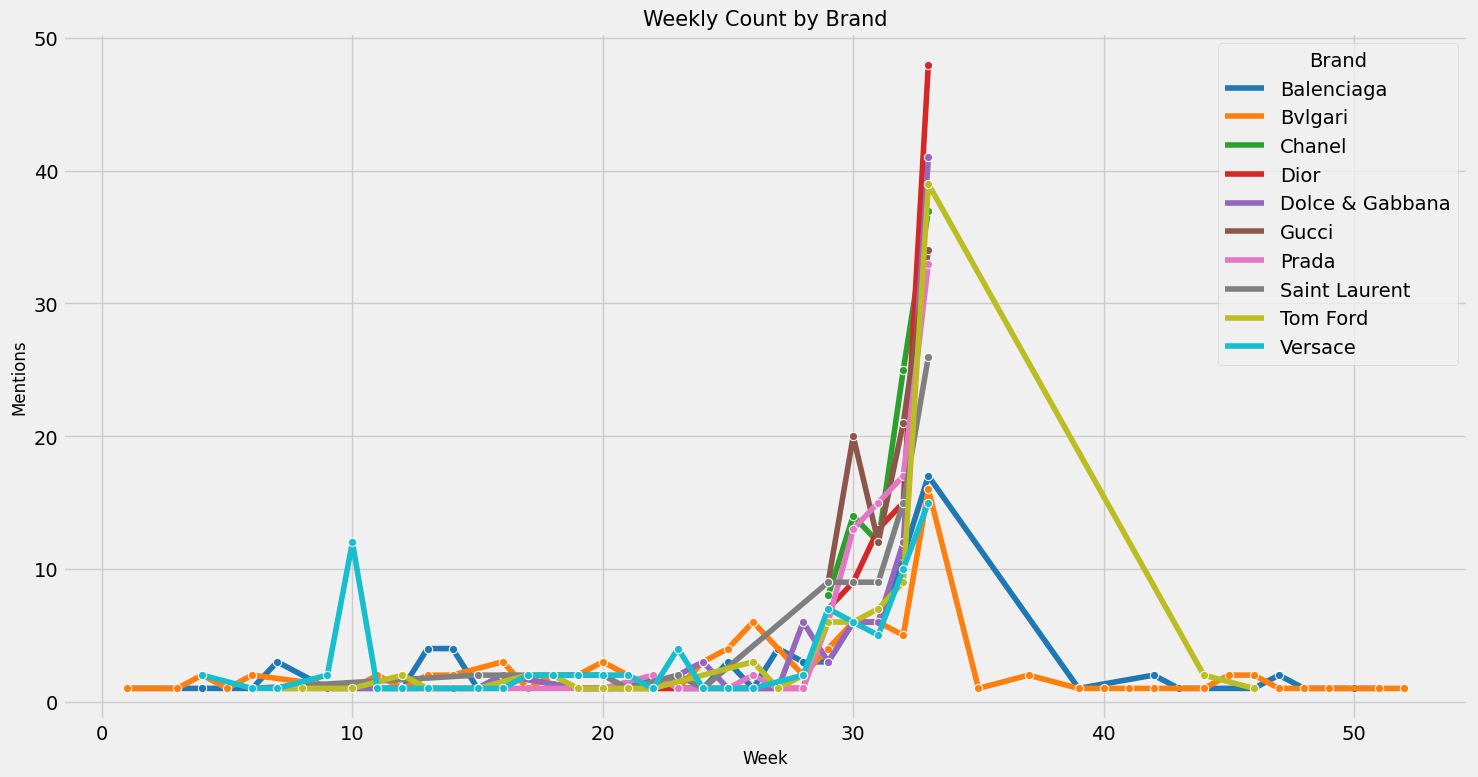

In [46]:

# Convert 'Week' column to regular integer type
df_count['Week'] = df_count['Week'].astype(int)

plt.figure(figsize=(15, 8))
plt.style.use('fivethirtyeight')

# Plot the time series for each brand
sns.lineplot(data=df_count, x='Week', y='count', hue='Brand', marker="o", palette="tab10")

# Customize the plot
plt.title('Weekly Count by Brand', fontsize=15)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Mentions', fontsize=12)
plt.legend(title='Brand')

plt.tight_layout()
plt.show()


In [49]:
print(df.head(3))

                       Date              Source  \
0 2023-08-17 18:23:00+00:00  Retail TouchPoints   
1 2023-08-17 02:00:00+00:00         PR Newswire   
2 2023-08-17 04:16:02+00:00  Inside Retail Asia   

                                            Headline  Brand Sentiment  \
0    Gucci Launches Digital Flagship Store on JD.com  Gucci  POSITIVE   
1  Gucci and JD.com Announce Digital Partnership ...  Gucci  POSITIVE   
2       Gucci launches flagship store on JD platform  Gucci  POSITIVE   

   Sentiment_Score  Date_Numeric  Week    Month  
0         0.976898        738749    33  2023-08  
1         0.998710        738749    33  2023-08  
2         0.957851        738749    33  2023-08  


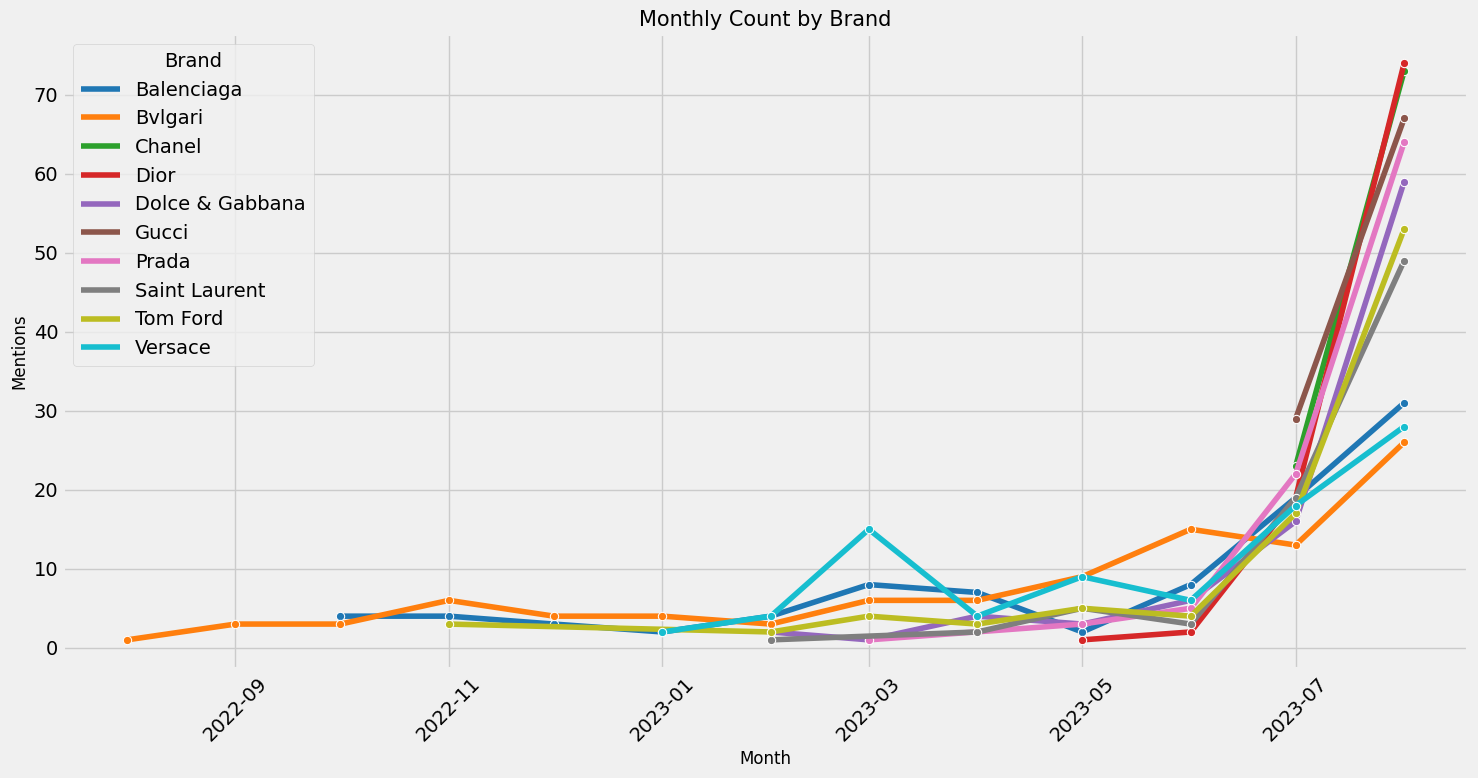

In [47]:
warnings.filterwarnings('ignore', message='Converting to PeriodArray/Index representation will drop timezone information.')

# Convert the 'Date' column to datetime type if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract month from the 'Date' column
df['Month'] = df['Date'].dt.to_period('M')

# Group by Brand and Month and count the number of occurrences
df_count = df.groupby(['Brand', 'Month']).size().reset_index(name='Count')

# Convert the 'Month' column to a datetime format
df_count['Month'] = df_count['Month'].dt.to_timestamp()

# Create the plot
plt.figure(figsize=(15, 8))
plt.style.use('fivethirtyeight')

# Plot the time series for each brand
sns.lineplot(data=df_count, x='Month', y='Count', hue='Brand', marker="o", palette="tab10")

# Customize the plot
plt.title('Monthly Count by Brand', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Mentions', fontsize=12)
plt.legend(title='Brand')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [50]:
grouped_text = df.groupby('Brand')['Headline'].apply(' '.join).reset_index()


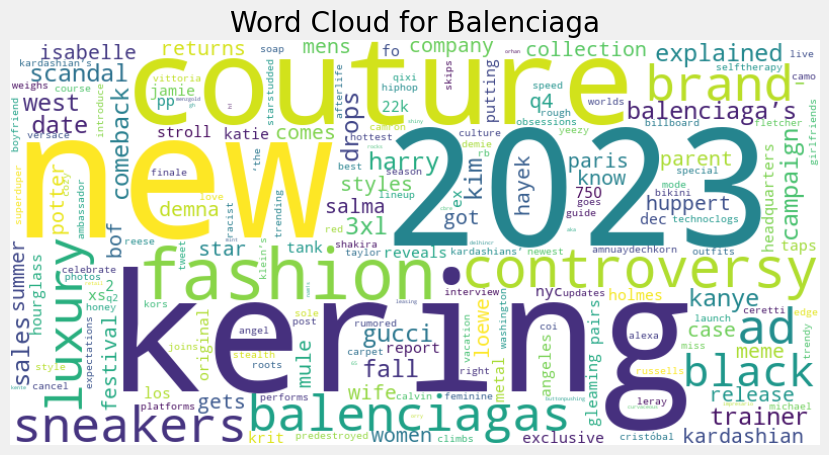

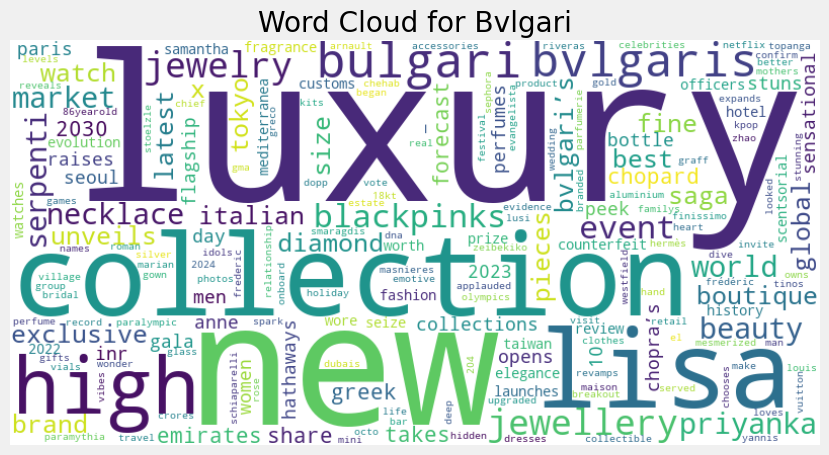

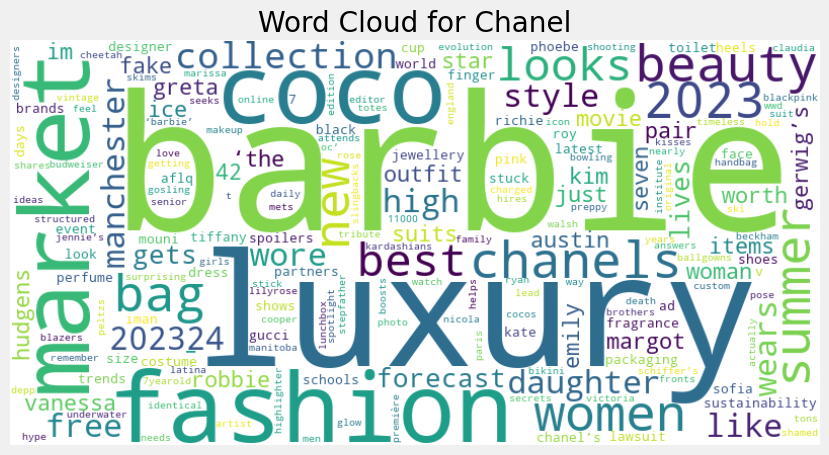

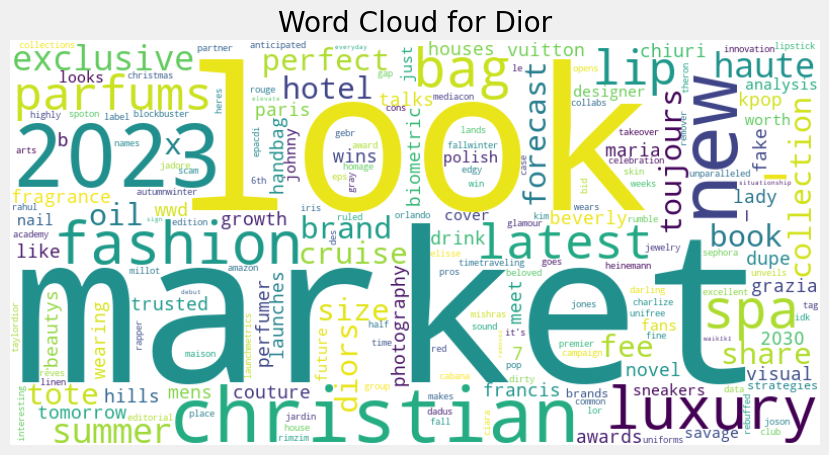

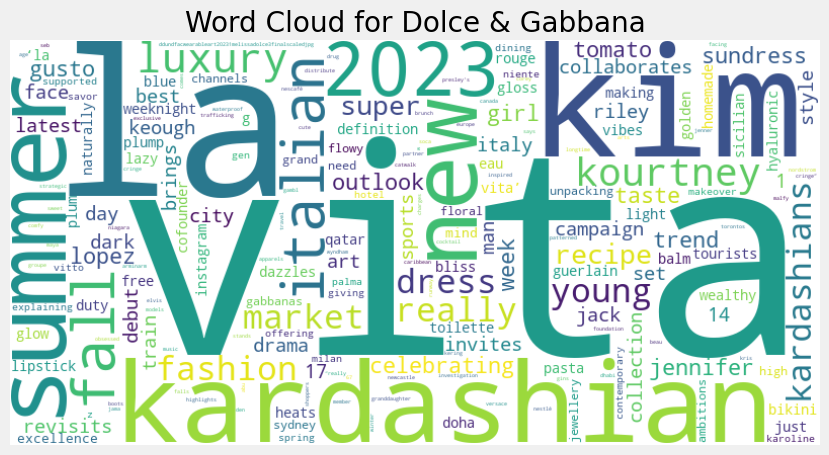

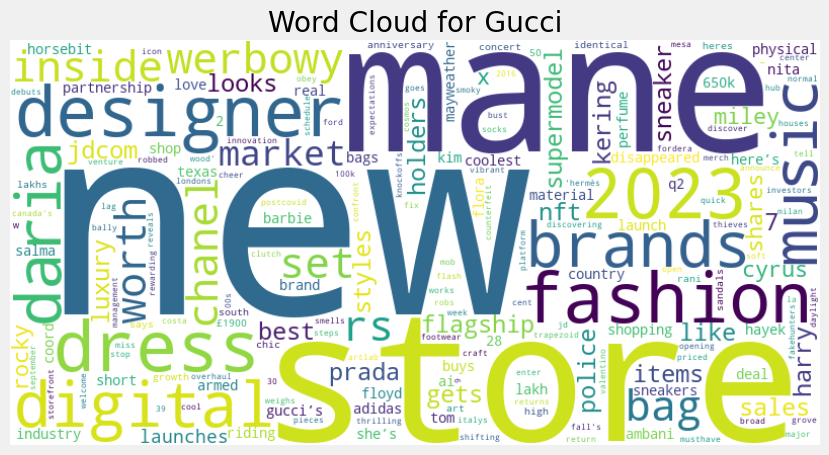

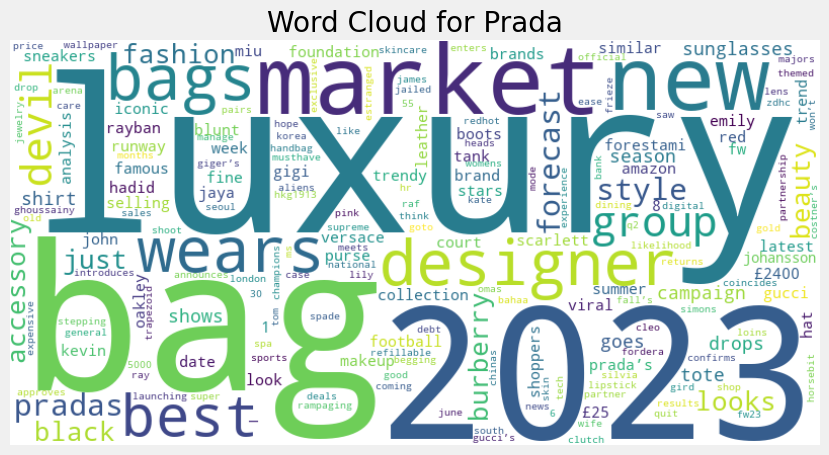

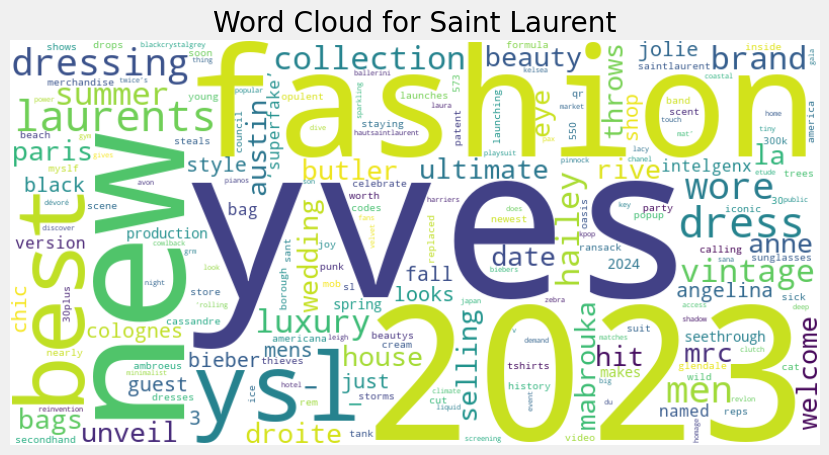

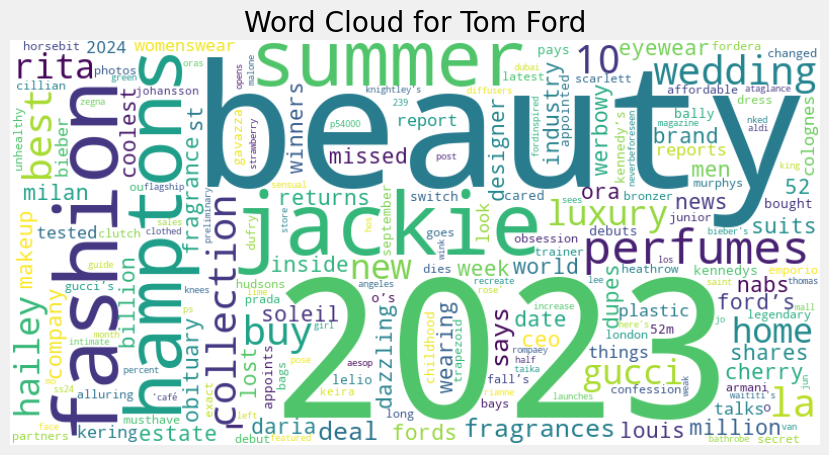

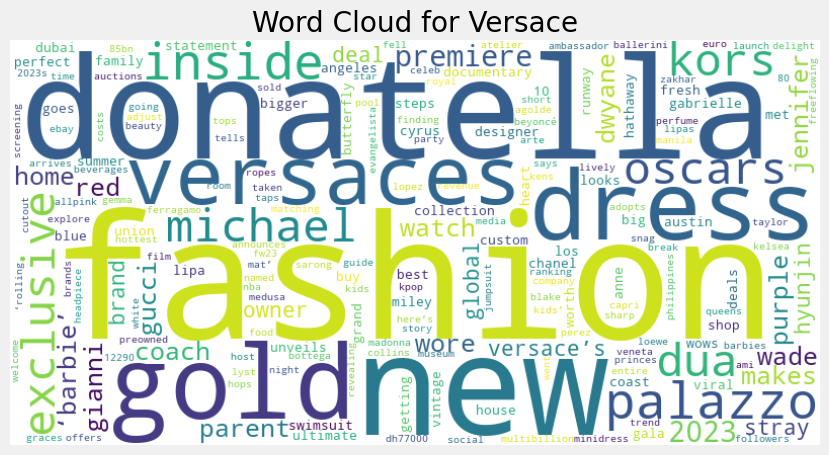

In [51]:
def preprocess(text, brand_words):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in ENGLISH_STOP_WORDS and word not in brand_words]
    return ' '.join(words)

def get_word_frequency(text):
    words = text.split()
    return Counter(words)

for index, row in grouped_text.iterrows():
    brand = row['Brand']
    brand_words = set(brand.lower().split())  # Tokenize brand name into individual words
    text = preprocess(row['Headline'], brand_words)  # Pass the set of brand words
    frequencies = get_word_frequency(text)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencies)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for {brand}')
    plt.show()